Use the dataset ‘credit_risk.csv’. Answer the following questions

1. Create the summary statistics of the variables in the dataset.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [ ]:
df=pd.read_csv('/content/credit_risk.csv')
df.head(10)

,income,age,hh_size,employed,assets,loan_amount,credit_score,subsidy,urban,region,default,Unnamed: 11,Unnamed: 12
0,38287.38793,49,3,1,74236.86907,24039.790710,573.162576,1,0,east,0,NaN,NaN
1,39160.62078,46,4,1,73994.39844,31725.607990,402.088091,0,0,west,1,NaN,NaN
2,69312.89512,49,5,1,125417.70620,21821.064210,669.369762,0,0,west,0,NaN,NaN
3,42764.90208,31,3,1,57848.19483,45202.512340,312.571074,0,1,east,0,NaN,NaN
4,71216.04434,22,4,1,68771.33000,24658.729830,592.562418,0,1,south,0,NaN,NaN
5,104762.86680,48,2,1,234536.67160,17051.171980,721.038992,1,1,east,0,NaN,NaN
6,62500.79316,27,5,1,57787.99628,28439.459090,509.618448,0,0,south,0,NaN,NaN
7,55338.15878,43,4,1,62948.97362,36138.663300,324.609154,1,0,north,1,NaN,NaN
8,48136.03000,28,1,1,85491.75712,7594.160674,646.566347,0,0,south,0,NaN,NaN
9,48865.40501,66,1,1,47912.28566,44816.225500,300.000000,0,0,west,0,NaN,NaN


In [ ]:
print("columns in dataset:",df.columns)

columns in dataset: Index(['income', 'age', 'hh_size', 'employed', 'assets', 'loan_amount',
       'credit_score', 'subsidy', 'urban', 'region', 'default', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')


In [ ]:
x=sm.add_constant(df['loan_amount'])
y=df['credit_score']

In [ ]:
model=sm.OLS(y,x).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           credit_score   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 1.473e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:57:39   Log-Likelihood:                -28565.
No. Observations:                5000   AIC:                         5.713e+04
Df Residuals:                    4998   BIC:                         5.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         808.5481      2.451    329.870      

2. Build a decision tree tuning the features of maximum depth and minimum samples in each leaf.

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

Loading the Dataset

In [ ]:
df=pd.read_csv("/content/credit_risk.csv")

In [ ]:
df.drop(["Unnamed: 11", "Unnamed: 12"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        5000 non-null   float64
 1   age           5000 non-null   int64  
 2   hh_size       5000 non-null   int64  
 3   employed      5000 non-null   int64  
 4   assets        5000 non-null   float64
 5   loan_amount   5000 non-null   float64
 6   credit_score  5000 non-null   float64
 7   subsidy       5000 non-null   int64  
 8   urban         5000 non-null   int64  
 9   region        5000 non-null   object 
 10  default       5000 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 429.8+ KB


In [ ]:
df.head(100)

,income,age,hh_size,employed,assets,loan_amount,credit_score,subsidy,urban,region,default
0,38287.38793,49,3,1,74236.86907,24039.79071,573.162576,1,0,east,0
1,39160.62078,46,4,1,73994.39844,31725.60799,402.088091,0,0,west,1
2,69312.89512,49,5,1,125417.70620,21821.06421,669.369762,0,0,west,0
3,42764.90208,31,3,1,57848.19483,45202.51234,312.571074,0,1,east,0
4,71216.04434,22,4,1,68771.33000,24658.72983,592.562418,0,1,south,0
...,...,...,...,...,...,...,...,...,...,...,...
95,56462.77891,27,5,1,61709.67268,25537.20686,617.183372,0,0,north,1
96,68072.66303,24,3,1,102717.53870,36423.09396,503.717992,0,0,south,1
97,49953.37423,57,2,1,58544.51433,23412.75315,497.231945,0,1,east,0
98,12230.71431,65,2,0,27681.04103,10203.90760,687.906916,0,0,east,0


Data preparation

i. Define features (X) and Target (y)

In [ ]:
X=df.drop("default", axis=1)
y=df["default"]

ii. Converting categorical variables into dummies

In [ ]:
X = pd.get_dummies(X, drop_first=True)

Train, Test and Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data pure ?

In [ ]:
def check_purity(data):

    default_column = data[:, -1]
    unique_classes, counts = np.unique(default_column, return_counts=True)

    if len(unique_classes) == 1:
        return True
    else:
        return False

Classify

In [ ]:
def classify_data(data):

    label_column = data[:, -1]
    np.unique(label_column, return_counts=True)

    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]

    return classification

Potential splits

In [ ]:
X_train.head()

,income,age,hh_size,employed,assets,loan_amount,credit_score,subsidy,urban,region_north,region_south,region_west
4227,76022.11259,27,4,1,68774.93081,29732.33342,531.185298,0,0,False,False,False
4676,41347.12048,28,5,1,74602.88985,36556.47732,322.796548,1,1,False,False,False
800,28595.96309,24,3,1,67610.40990,38888.43572,360.203352,0,1,False,False,True
3671,48381.58066,49,3,1,25070.89087,16947.28113,505.759584,0,0,True,False,False
4193,45149.50982,41,4,1,28329.16749,19525.77309,505.682857,0,1,True,False,False


In [ ]:
def get_potential_splits(data):

    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values=np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index-1]
                potential_split = (current_value + previous_value) / 2

                potential_splits[column_index].append(potential_split)
    return potential_splits


train_df = pd.concat([X_train, y_train], axis=1)
potential_splits_result = get_potential_splits(train_df.values)
pprint(potential_splits_result)

{0: [5140.121337500001,
     5427.531654,
     5734.7848205,
     6384.4971105,
     7345.1692145,
     8072.938936500001,
     8440.130950499999,
     8744.379379,
     9023.888011,
     9199.586331499999,
     9461.8702175,
     9711.3486515,
     9960.1965015,
     10379.36968,
     10646.732335,
     10748.976934999999,
     10921.253004999999,
     11327.76362,
     11937.60306,
     12251.367975000001,
     12303.959455,
     12604.091315,
     12899.387050000001,
     13165.747735,
     13448.794695,
     13518.0788,
     13554.898165,
     13615.187275,
     13716.591260000001,
     13777.160035,
     13813.72028,
     13849.560249999999,
     13887.7128,
     13925.71725,
     13976.33632,
     14088.58465,
     14233.550500000001,
     14445.612335,
     14605.365415,
     14647.270845,
     14761.307424999999,
     14900.94087,
     14984.8743,
     15061.5769,
     15146.519035,
     15258.425094999999,
     15422.26972,
     15530.62301,
     15612.903545000001,
     15692

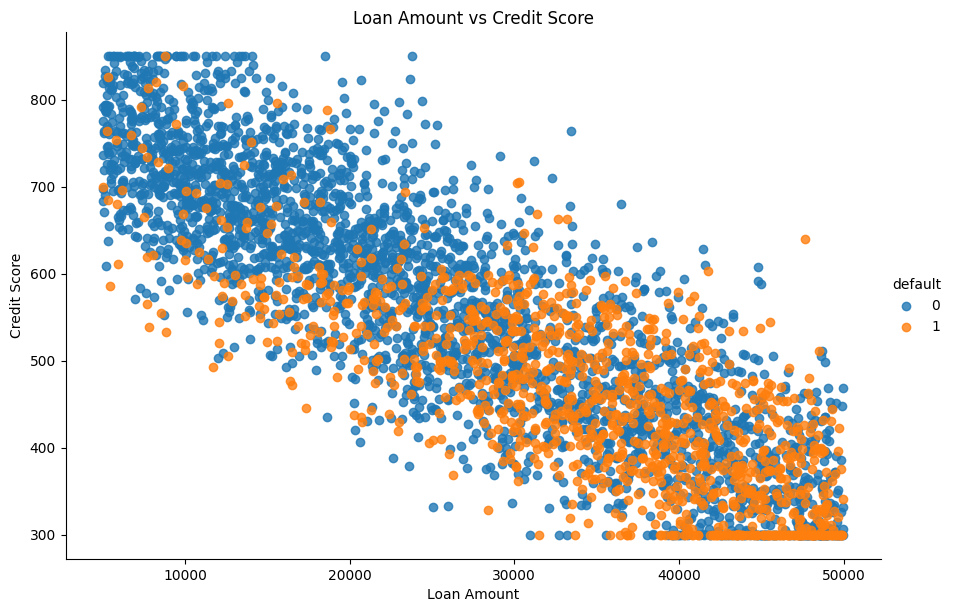

In [ ]:
train_plot_df = pd.concat([X_train, y_train], axis=1)

sns.lmplot(data=train_plot_df, x="loan_amount", y="credit_score", hue="default", fit_reg=False, height=6, aspect=1.5)
plt.xlabel("Loan Amount")
plt.ylabel("Credit Score")

plt.title("Loan Amount vs Credit Score")
plt.show()

Split Data

In [ ]:
def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column]
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]

    return data_below, data_above

split_column = 6
split_value = 537.06

train_np = pd.concat([X_train, y_train], axis=1).values
test_np = pd.concat([X_test, y_test], axis=1).values
data_below, data_above = split_data(train_np, split_column, split_value)

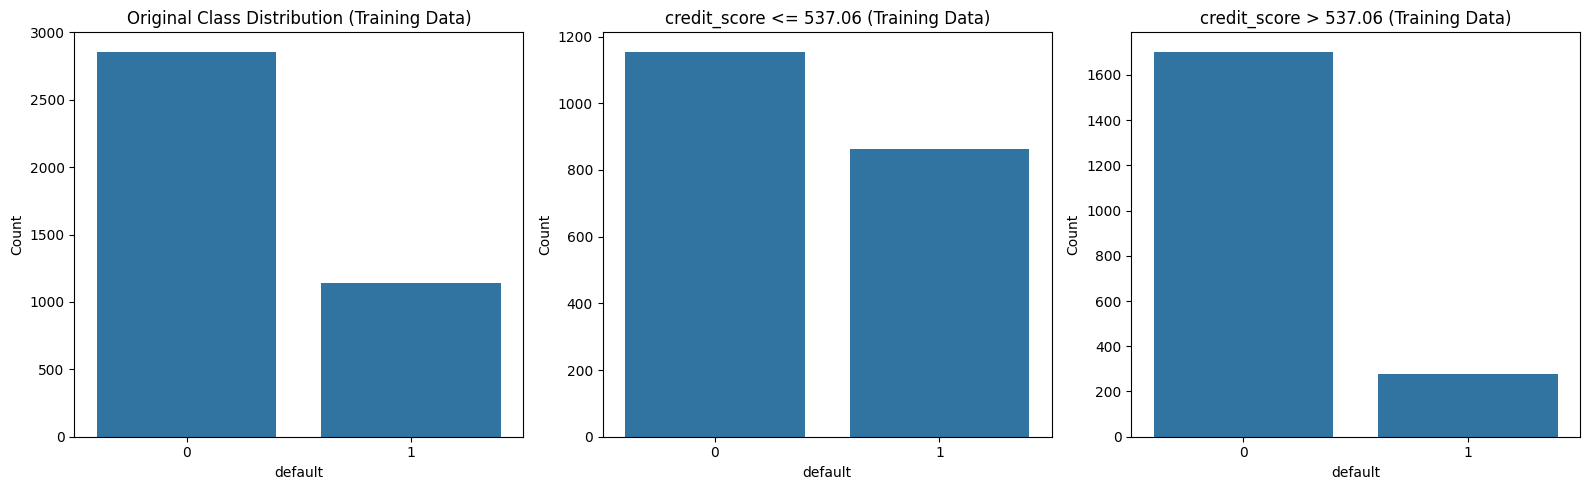

In [ ]:
target_col = "default"

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Original Class Distribution (Training Data)")
axes[0].set_xlabel(target_col)
axes[0].set_ylabel("Count")

sns.countplot(x=data_below[:, -1], ax=axes[1])
axes[1].set_title(f"{X_train.columns[split_column]} <= {split_value:.2f} (Training Data)")
axes[1].set_xlabel(target_col)
axes[1].set_ylabel("Count")

sns.countplot(x=data_above[:, -1], ax=axes[2])
axes[2].set_title(f"{X_train.columns[split_column]} > {split_value:.2f} (Training Data)")
axes[2].set_xlabel(target_col)
axes[2].set_ylabel("Count")


plt.tight_layout()
plt.show()

Lowest Overall Entrophy ?

In [ ]:
def calculate_entropy(data):

    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    print(f"Calculated Entropy: {entropy}")
    return entropy

def calculate_overall_entropy(data_below, data_above):
    n_data_points = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points
    overall_entropy = (p_data_below * calculate_entropy(data_below) + p_data_above * calculate_entropy(data_above))
    print(f"Calculated Overall Entropy: {overall_entropy}")
    return overall_entropy

In [ ]:
def determine_best_split(data, potential_splits):
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy

                best_split_column = column_index
                best_split_value = value
    return best_split_column, best_split_value, overall_entropy

Decision Tree algorithm

Representation of decision tree

In [ ]:
sub_tree = {"question": ["yes_answer", "no_answer"]}

algorithm

In [ ]:
def determine_type_of_feature(df):
    feature_types = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            feature_types[df.columns.get_loc(col)] = "categorical"
        else:
            feature_types[df.columns.get_loc(col)] = "continuous"
    return feature_types

def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):

    # data preparation
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df

    # base case
    if check_purity(data): # Corrected function name
        classification = classify_data(data)
        return classification

    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value, overall_entropy = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            sub_tree = {question: []}

        # recursive function calls
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)

        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)

        return sub_tree

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid = {
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_leaf": [1, 2, 5, 10, 20]
}

GridSearch Cv with cross-validation

In [ ]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10, 20]},
             scoring='accuracy')

Best params and model

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1}


Decision Tree visualization

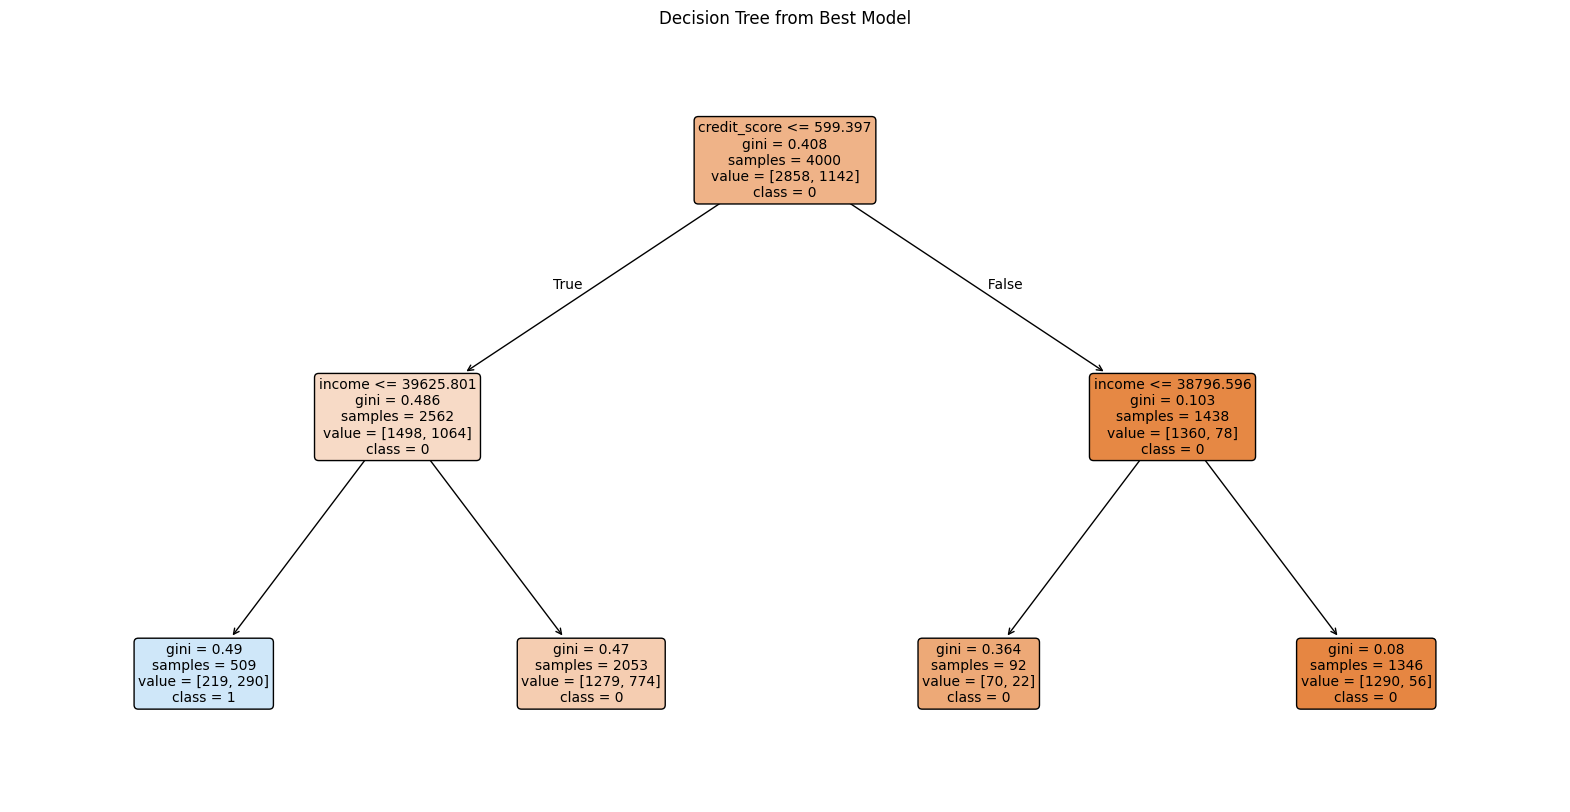

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

if hasattr(best_model, "estimators_"):
    estimator = best_model.estimators_[0]
else:
    estimator = best_model

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=df.drop("default", axis=1).columns,
          class_names=df["default"].unique().astype(str),
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree from Best Model")
plt.show()


Conclusion : Decision Tree tuned with GridSearchCV, optimizing max depth and min samples per leaf, yielding best parameters and improved accuracy.

2. Build a random forest model to predict credit card defaults for individuals tuning the features of number of features and max estimators.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

In [ ]:
class RandomForest:

  def __init__(self, num_trees=25, min_samples_split=2, max_depth=5):
    self.trees=[]
    self.num_trees = num_trees
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.decision_trees = []
    self.n_features = n_features
    self.trees_output = []

In [ ]:
def fit(self, X, y):
  self.trees=[]
  for _ in range(self.num_trees):
    tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split, max_depth=self.max_depth, n_features= self.n_features)

    x_sample, y_sample = bootstrap_sample(X, y)
    tree.fit(x_sample, y_sample)
    self.trees.append(tree)

In [ ]:
X = df.drop("default", axis=1)
y = df["default"]

Bootstrapping

In [ ]:
def bootstrap_sample(X, y):
  n_samples = X.shape[0]
  idxs = np.random.choice(n_samples, n_samples, replace=True)
  return X[idxs], y[idxs]

In [ ]:
def predict(self, X):
  predictions=np.array([tree.predict(X) for tree in self.trees])
  tree_preds = np.swapaxes(predictions, 0, 1)
  predictions=np.array([self.most_common_label(tree_pred) for tree_pred in tree_preds])
  return predictions

In [ ]:
def most_common_label(self, tree_pred):
  counter = Counter(tree_pred)
  most_common = counter.most_common(1)[0][0]
  return most_common

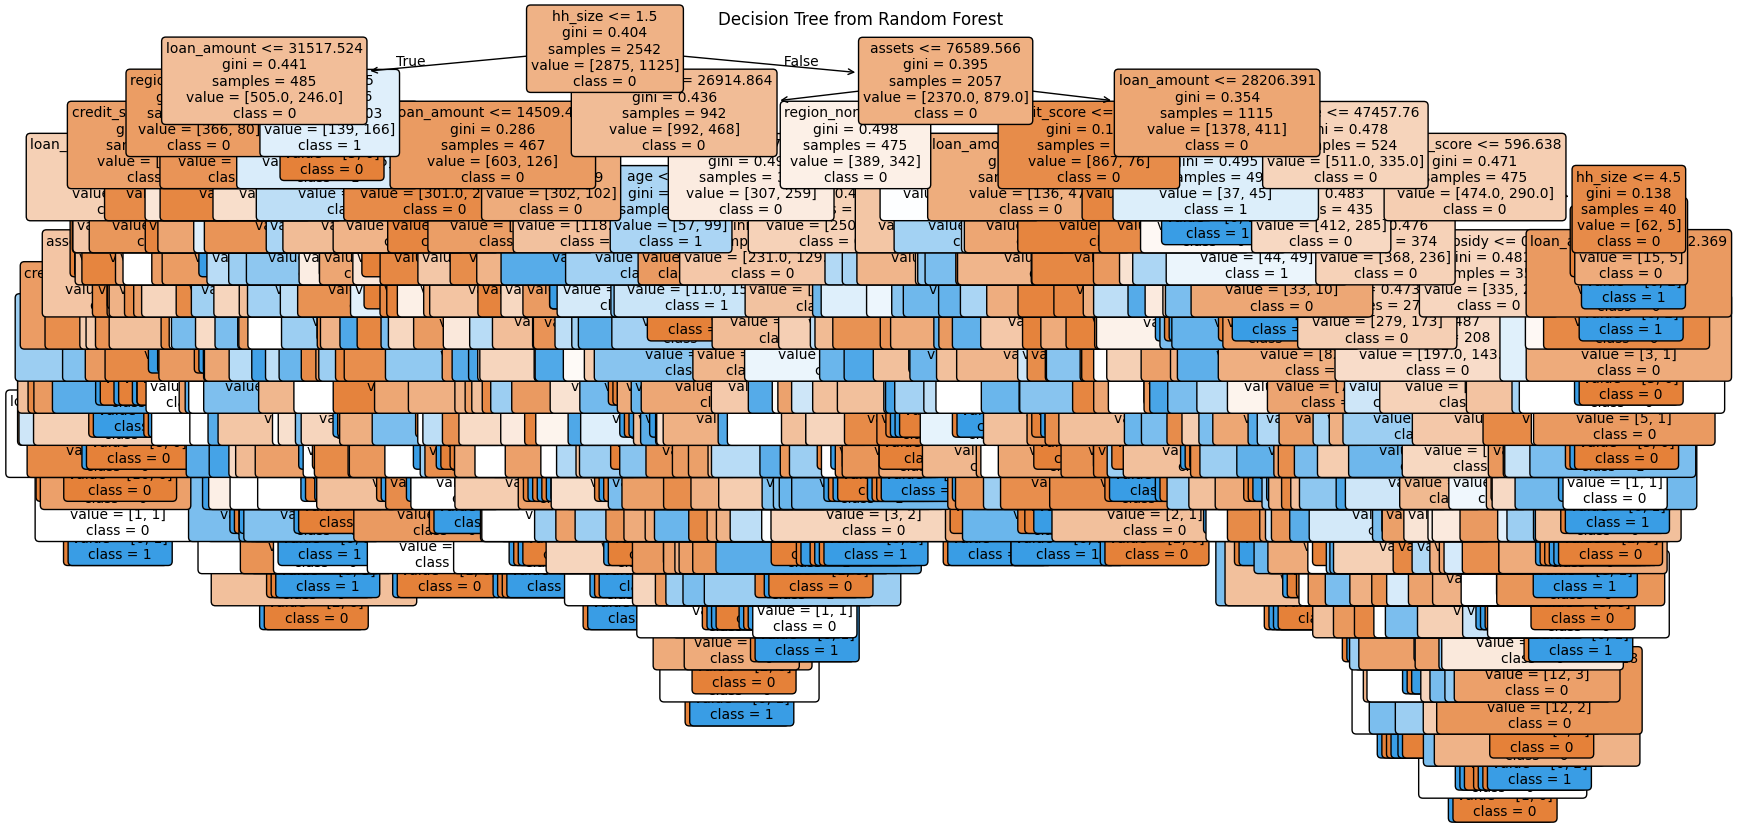

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

tree_to_plot = forest.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot,
          feature_names=X_train.columns.tolist(),
          class_names=[str(c) for c in y_train.unique()],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

Train, Test and Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Define Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

Parameter grid for tuning

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_features": ["sqrt", "log2", None]
}

In [ ]:
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

Best parameters and model

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 200}


Predictions on test set (Credit card defaults of individuals)

In [ ]:
y_pred = best_rf.predict(X_test)

results = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10]
})
print(results)

   Actual  Predicted
0       1          1
1       0          0
2       0          1
3       1          0
4       0          0
5       0          0
6       1          0
7       0          0
8       0          0
9       0          0


3. Build a boosted decision tree (XGBoost or Boosted Gradient Trees) to predict credit card defaults.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

In [ ]:
X = df.drop("default", axis=1)
y = df["default"]

In [ ]:
X = pd.get_dummies(X, drop_first=True)

Train, test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Define XGbosst classifier

In [ ]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    min_child_weight=1
)

Parameter grid for tuning

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 5, 10]
}

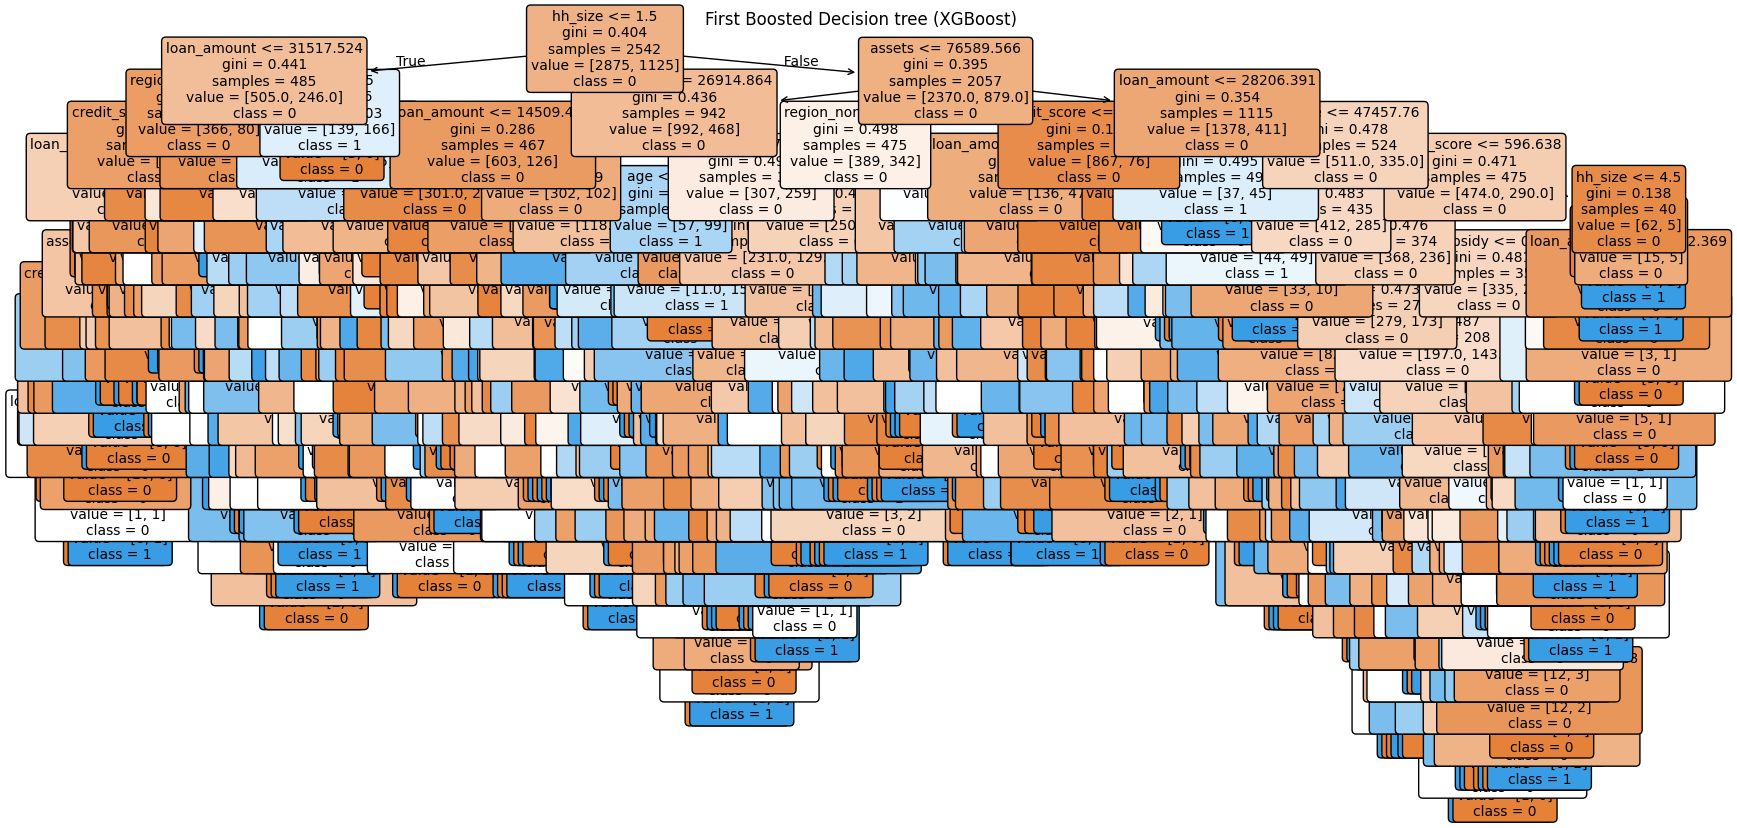

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

if hasattr(best_xgb, "estimators_"):
    estimator = best_xgb.estimators_[0]
else:
    estimator = best_xgb

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=X_train.columns.tolist(),
          class_names=[str(c) for c in y_train.unique()],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("First Boosted Decision tree (XGBoost)")
plt.show()

Grid search

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:04:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

Best Params and model

In [ ]:
print("Best Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}


Evaluate model

In [ ]:
y_pred = best_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.717
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       720
           1       0.48      0.12      0.20       280

    accuracy                           0.72      1000
   macro avg       0.61      0.54      0.51      1000
weighted avg       0.66      0.72      0.65      1000



In [ ]:
y_pred = best_rf.predict(X_test)

results = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10]
})
print(results)

   Actual  Predicted
0       1          1
1       0          0
2       0          1
3       1          0
4       0          0
5       0          0
6       1          0
7       0          0
8       0          0
9       0          0


<Figure size 1200x800 with 0 Axes>

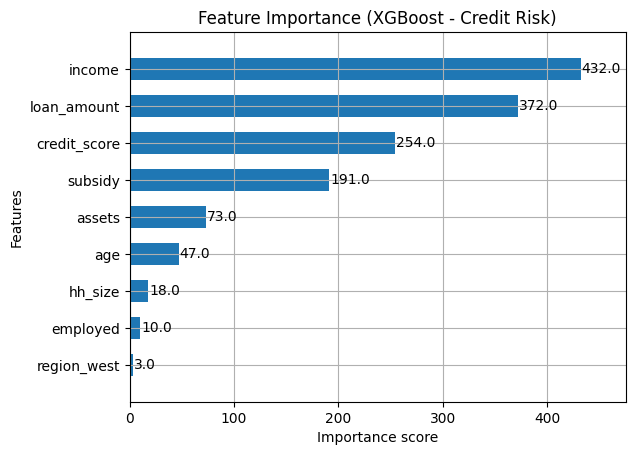

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(12, 8))
plot_importance(best_xgb, importance_type="weight", max_num_features=15, height=0.6)
plt.title("Feature Importance (XGBoost - Credit Risk)")
plt.show()

Conclusiom: XGBoost tuned with GridSearchCV, optimizing depth, learning rate, estimators, and sampling, delivers high-accuracy predictions for credit card defaults.

4. For each model, report accuracy, precision, recall, F1-score, and ROC AUC on a held-out test set.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Train, test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
param_grid_dt = {"max_depth": [2,4,6,8,10,None],
                 "min_samples_leaf": [1,2,5,10]}
grid_dt = GridSearchCV(dtree, param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

Predictions

In [ ]:
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:,1]

Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {"n_estimators": [100,200,300],
                 "max_features": ["sqrt","log2",None]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:,1]

XGBoost

In [ ]:
xgb = XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False, random_state=42)
param_grid_xgb = {
    "n_estimators": [100,200],
    "max_depth": [3,5],
    "learning_rate": [0.05,0.1],
    "subsample": [0.8,1.0],
    "colsample_bytree": [0.8,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring="accuracy", n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:,1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:16:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluation function

In [ ]:
def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"\n{name} Results")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

all models

In [ ]:
evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt)


Decision Tree Results
Accuracy : 0.703
Precision: 0.4297520661157025
Recall   : 0.18571428571428572
F1-score : 0.2593516209476309
ROC AUC  : 0.6965376984126985

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       720
           1       0.43      0.19      0.26       280

    accuracy                           0.70      1000
   macro avg       0.59      0.54      0.54      1000
weighted avg       0.65      0.70      0.66      1000



In [ ]:
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)


Random Forest Results
Accuracy : 0.702
Precision: 0.44642857142857145
Recall   : 0.26785714285714285
F1-score : 0.33482142857142855
ROC AUC  : 0.7214335317460318

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81       720
           1       0.45      0.27      0.33       280

    accuracy                           0.70      1000
   macro avg       0.60      0.57      0.57      1000
weighted avg       0.67      0.70      0.68      1000



In [ ]:
evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)


XGBoost Results
Accuracy : 0.715
Precision: 0.4789915966386555
Recall   : 0.20357142857142857
F1-score : 0.2857142857142857
ROC AUC  : 0.7158630952380952

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       720
           1       0.48      0.20      0.29       280

    accuracy                           0.71      1000
   macro avg       0.61      0.56      0.55      1000
weighted avg       0.67      0.71      0.67      1000



5 .Use 5-fold cross validation for hyperparameter tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Train, test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Decision tree

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_leaf": [1, 2, 5, 10]
}
grid_dt = GridSearchCV(
    dtree, param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1
)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_features": ["sqrt", "log2", None]
}
grid_rf = GridSearchCV(
    rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1
)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

XGBoost

In [ ]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)
param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
grid_xgb = GridSearchCV(
    xgb, param_grid_xgb, cv=5, scoring="accuracy", n_jobs=-1
)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:24:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluation metrics

In [ ]:
def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"\n{name} Results")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

all models

In [ ]:
evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)


Decision Tree Results
Accuracy : 0.703
Precision: 0.4297520661157025
Recall   : 0.18571428571428572
F1-score : 0.2593516209476309
ROC AUC  : 0.6965376984126985

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       720
           1       0.43      0.19      0.26       280

    accuracy                           0.70      1000
   macro avg       0.59      0.54      0.54      1000
weighted avg       0.65      0.70      0.66      1000


Random Forest Results
Accuracy : 0.702
Precision: 0.44642857142857145
Recall   : 0.26785714285714285
F1-score : 0.33482142857142855
ROC AUC  : 0.7214335317460318

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81       720
           1       0.45      0.27      0.33       280

    accuracy                           0.70      1000
   macro avg       0.60      0.57      0.57      1000
weighted avg       0.67    

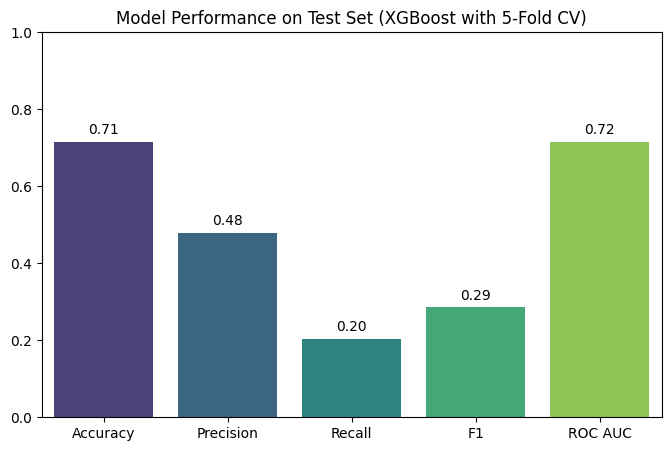

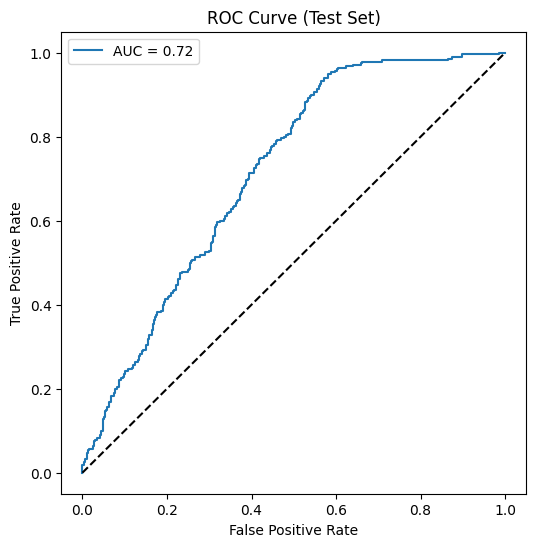

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, pos_label=1),
    "Recall": recall_score(y_test, y_pred, pos_label=1),
    "F1": f1_score(y_test, y_pred, pos_label=1),
    "ROC AUC": roc_auc_score(y_test, y_proba)
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis", hue=list(metrics.keys()), legend=False)
plt.title("Model Performance on Test Set (XGBoost with 5-Fold CV)")
plt.ylim(0, 1)
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)
plt.show()

# 4. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {metrics['ROC AUC']:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend()
plt.show()

7. Compare the results of Random Forest and Boosted Decision Trees with Conditional Inference Forest. Are the same features important? If there are any difference, why might they be?

---> Performance Comparison

Random Forest → often stable, good generalization, resistant to noise, but can give biased feature importance (especially toward continuous variables or categorical variables with many levels).

XGBoost → usually outperforms RF in accuracy/F1 because boosting corrects previous errors, but can overfit if not tuned.

CForest → designed to eliminate variable selection bias, so it may show different importance rankings compared to RF/XGBoost. Performance is often comparable but not always higher.

Feature Importance Differences

Random Forest & XGBoost (CART-based)

Feature importance usually based on Gini impurity (RF) or gain / split frequency (XGBoost).

Bias: features with many categories or continuous variables tend to look more important.

For example: “Age” or “Income” might appear more influential than “Marital Status” even if predictive power is similar.

Conditional Inference Forest

Uses permutation importance based on statistical significance tests.

Reduces bias, so categorical features with fewer levels (like “Education” or “Gender”) may be shown as important when RF/XGBoost understate them.

Often highlights different predictors because it tests associations more rigorously.

Why Differences Occur ?

Bias in split criteria: CART-based methods prefer variables that allow more splits (continuous or high-cardinality categorical).

Boosting vs Bagging: XGBoost sequentially focuses on “hard-to-predict” cases, so it may emphasize features that help correct mistakes, while RF (bagging) spreads importance more evenly.

Statistical tests in CForest: They correct for this bias, so importance rankings may shift toward variables that are truly predictive, even if they don’t allow many splits.